In [3]:
import numpy as np
import matplotlib.pyplot as plt
import interneuron_amb
import stellate
from neuron import h

h.load_file("stdrun.hoc")

import importlib
importlib.reload(interneuron_amb)
importlib.reload(stellate)

<module 'stellate' from '/home/govind/gov_semproject/GridCellsTheta/GridCellsCond/stellate.py'>

In [4]:
intrnrn_0 = interneuron_amb.Interneuron(0)
stellate_0 = stellate.Stellate(0)
global_intrnrn = interneuron_amb.Interneuron(1)

is_weight = 20.0
si_weight = 1.0
gi_weight = 2.0
is_inhb_gmax = 1e-4  # uS
si_exc_gmax = 6e-6   # uS
gi_inh_gmax = 4e-4  # uS

nc_is = h.NetCon(intrnrn_0.soma(0.5)._ref_v, stellate_0.inhb_syn, sec=intrnrn_0.soma)
nc_is.weight[0] = is_weight * is_inhb_gmax
nc_si = h.NetCon(stellate_0.soma(0.5)._ref_v, intrnrn_0.exc_syn, sec=stellate_0.soma)
nc_si.weight[0] = si_weight * si_exc_gmax
nc_gi = h.NetCon(global_intrnrn.soma(0.5)._ref_v, intrnrn_0.inhb_syn, sec=global_intrnrn.soma)
nc_gi.weight[0] = gi_weight * gi_inh_gmax * 0

global_intrnrn.ext_theta_dc = h.IClamp(global_intrnrn.soma(0.5))

In [ ]:
sim_dur = 1000
dt = 0.025
theta_freq = 0.0
theta_amp = 1e-2

time_set = h.Vector(np.arange(0,sim_dur+dt, dt))

In [ ]:
time_arr = np.linspace(0,sim_dur+1,1000)
sin_arr = theta_amp * np.sin(2*np.pi*theta_freq*time_arr)   

theta_vec = h.Vector(sin_arr)
theta_vec.play(global_intrnrn.ext_theta_dc._ref_amp, time_set   

Vector[5]

40001


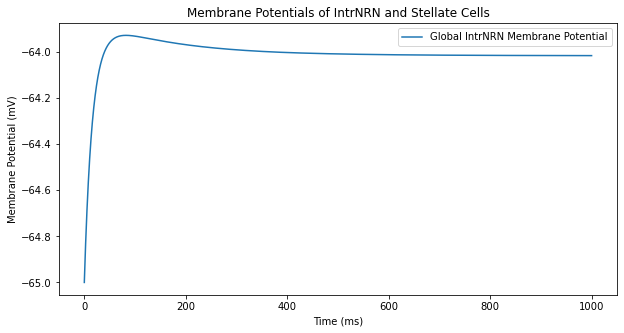

In [15]:

intrnrn_v = h.Vector().record(intrnrn_0.soma(0.5)._ref_v)
stellate_v = h.Vector().record(stellate_0.soma(0.5)._ref_v)
global_intrnrn_v = h.Vector().record(global_intrnrn.soma(0.5)._ref_v)
time = h.Vector().record(h._ref_t)


h.finitialize(-65)
h.continuerun(1000)
print(len(time.to_python()))
plt.figure(figsize=(10,5))
#plt.plot(time, intrnrn_v, label='IntrNRN Membrane Potential')
#plt.plot(time, stellate_v, label='Stellate Membrane Potential')
plt.plot(time, global_intrnrn_v, label='Global IntrNRN Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of IntrNRN and Stellate Cells')
plt.legend()
plt.show()

